In [172]:
!kaggle competitions download -c mercari-price-suggestion-challenge

sample_submission.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
test.tsv.7z: Skipping, found more recently modified local copy (use --force to force download)
train.tsv.7z: Skipping, found more recently modified local copy (use --force to force download)
sample_submission_stg2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_stg2.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
# https://www.kaggle.com/c/mercari-price-suggestion-challenge/data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
data_dir = "~/.kaggle/competitions/mercari-price-suggestion-challenge/"

In [3]:
# import data

# using 10000 data for checking data as of now.
import os
rows = None
train = pd.read_csv(os.path.join(data_dir, 'train.tsv'), sep='\t', nrows=rows)
# split data for training
train_ID = train['train_id']
y_train = train['price']
X_train = train.drop(['name', 'item_description', 'price', 'train_id'], axis=1)

test = pd.read_csv(os.path.join(data_dir, 'test.tsv'), sep='\t', nrows=rows)
test_ID = test['test_id']
X_test = test.drop(['name', 'item_description', 'test_id'], axis=1)

# TODO: it might better to add length of item description

In [176]:
print(list(X_train.columns.values))
print(list(X_test.columns.values))

['item_condition_id', 'category_name', 'brand_name', 'shipping']
['item_condition_id', 'category_name', 'brand_name', 'shipping']


In [177]:
print(X_train.shape)
print(X_test.shape)
print(X_train.dtypes)

(1482535, 4)
(693359, 4)
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
dtype: object


In [178]:
# string label to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(X_train.shape[1]):
    if X_train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(X_train.iloc[:,i].values) + list(X_test.iloc[:,i].values))
        X_train.iloc[:,i] = lbl.transform(list(X_train.iloc[:,i].values))
        X_test.iloc[:,i] = lbl.transform(list(X_test.iloc[:,i].values)) 

In [179]:
print(X_train.dtypes)

item_condition_id    int64
category_name        int64
brand_name           int64
shipping             int64
dtype: object


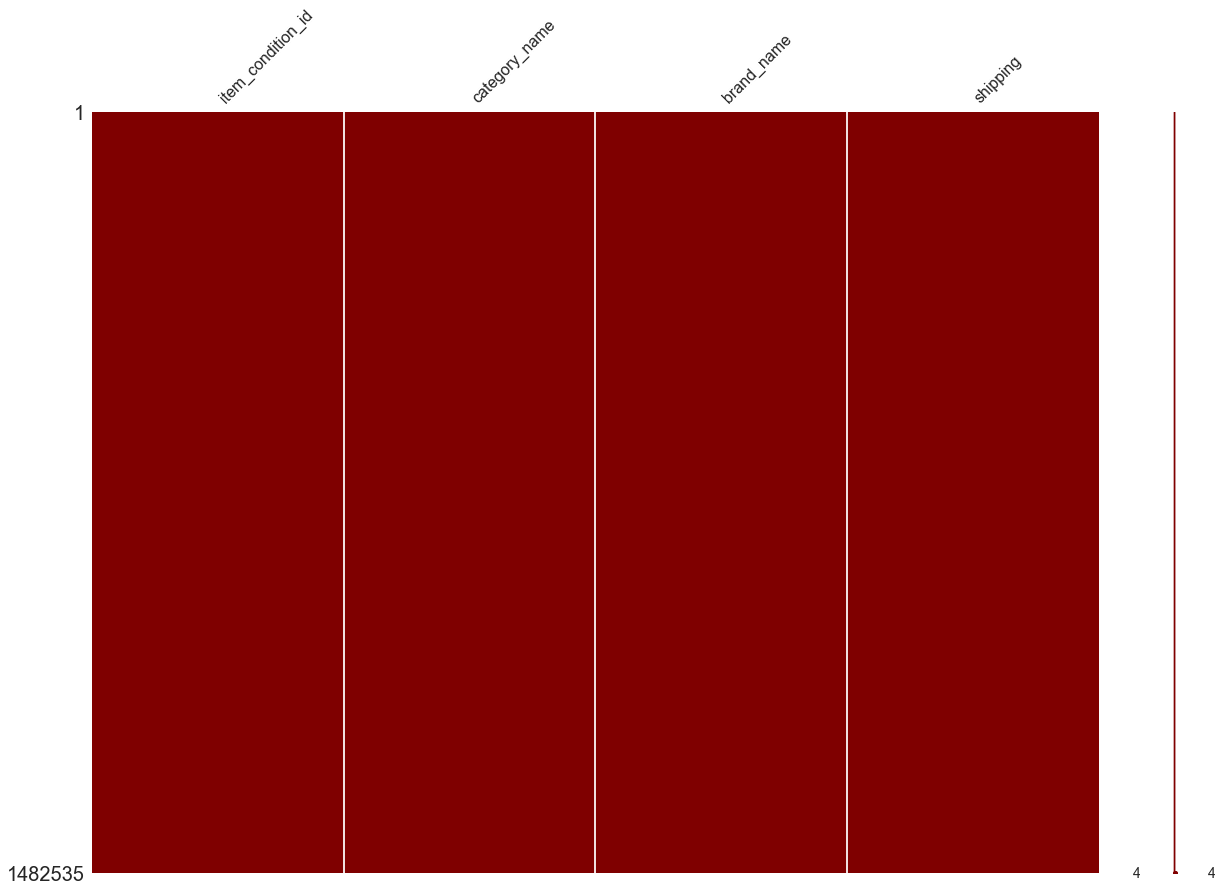

In [180]:
# search for missing data
import missingno as msno
%matplotlib inline
msno.matrix(df=X_train, figsize=(20,14), color=(0.5,0,0))

In [181]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

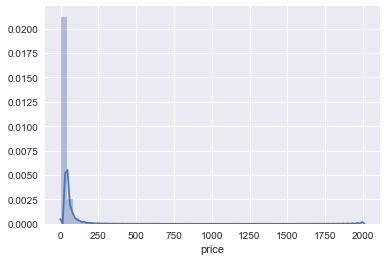

In [182]:
# normality check for the target
ax = sns.distplot(y_train)
plt.show()

In [ ]:
# TODO:
#log-transform the dependent the variable for normality
# y_train = np.log(y_train)
# ax = sns.distplot(y_train)
# plt.show()

In [ ]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

In [ ]:
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [ ]:
# relation to the target
# fig = plt.figure(figsize=(12,7))
# for i in np.arange(30):
#     ax = fig.add_subplot(5,6,i+1)
#     sns.regplot(x=X_train.iloc[:,i], y=y_train)

# plt.tight_layout()
# plt.show()

In [ ]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train, y_train)


In [ ]:
y_pred = reg_xgb.predict(X_test)

In [ ]:
# submission
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred
})

In [ ]:
print(submission)

In [ ]:
submission.to_csv('mericari.csv', index=False)